# Automating and Visualizing Data Using a Public API

### code to retrieve data:

In [73]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c7ff91aa-1225-4128-953f-e3dd9b4ddfa3',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#the above code was on the coinmarketcap.com /api website

{'status': {'timestamp': '2022-10-18T00:55:53.776Z', 'error_code': 0, 'error_message': None, 'elapsed': 77, 'credit_count': 25, 'notice': None, 'total_count': 9413}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9779, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [74]:
type(data)

dict

In [75]:
import pandas as pd

In [76]:
df=pd.json_normalize(data['data'])
df['timestamp']=pd.Timestamp('now') #adding a column so could know exactly when the data got pulled
df

id             name symbol             slug  num_market_pairs  \
0         1          Bitcoin    BTC          bitcoin              9779   
1      1027         Ethereum    ETH         ethereum              6140   
2       825           Tether   USDT           tether             40897   
3      3408         USD Coin   USDC         usd-coin              6532   
4      1839              BNB    BNB              bnb              1126   
...     ...              ...    ...              ...               ...   
4995   5330          Shardus    ULT          shardus                10   
4996  10501         BaconDAO  BACON         bacondao                 4   
4997  21106  Radiant Capital   RDNT  radiant-capital                 5   
4998  18896         MetaRare   MTRA         metarare                 3   
4999   9908               Ki    XKI    ki-foundation                 7   

                    date_added  \
0     2013-04-28T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2018-10-08T00:00:00.000Z   
4     2017-07-25T00:00:00.000Z   
...                        ...   
4995  2020-07-27T00:00:00.000Z   
4996  2021-06-18T00:00:00.000Z   
4997  2022-07-21T06:25:00.000Z   
4998  2022-03-17T06:47:29.000Z   
4999  2021-05-18T00:00:00.000Z   

                                                   tags       max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...   21000000.00000   
1     [pos, smart-contracts, ethereum-ecosystem, coi...              NaN   
2     [payments, stablecoin, asset-backed-stablecoin...              NaN   
3     [medium-of-exchange, stablecoin, asset-backed-...              NaN   
4     [marketplace, centralized-exchange, payments, ...  200000000.00000   
...                                                 ...              ...   
4995                                                 [] 1000000000.00000   
4996                        [collectibles-nfts, genpad]  200000000.00000   
4997                                [arbitrum-ecosytem] 1000000000.00000   
4998                                                 []              NaN   
4999            [cosmos-ecosystem, injective-ecosystem]  861548513.00000   

      circulating_supply      total_supply  platform  cmc_rank  \
0         19182181.00000    19182181.00000       NaN         1   
1        122373863.49900   122373863.49900       NaN         2   
2      68442559804.78809 70146125804.23895       NaN         3   
3      44754726833.10854 44754726833.10854       NaN         4   
4        161337261.09000   161337261.09000       NaN         5   
...                  ...               ...       ...       ...   
4995             0.00000  1000000000.00000       NaN      4996   
4996             0.00000    16633333.00000       NaN      4997   
4997             0.00000    51522981.00000       NaN      4998   
4998             0.00000   300000000.00000       NaN      4999   
4999             0.00000   947624753.00000       NaN      5000   

      self_reported_circulating_supply  self_reported_market_cap  tvl_ratio  \
0                                  NaN                       NaN        NaN   
1                                  NaN                       NaN        NaN   
2                                  NaN                       NaN        NaN   
3                                  NaN                       NaN        NaN   
4                                  NaN                       NaN        NaN   
...                                ...                       ...        ...   
4995                    32056760.00000             5567979.21451        NaN   
4996                               NaN                       NaN        NaN   
4997                    28459967.00000              497629.87162        NaN   
4998                               NaN                       NaN        NaN   
4999                   198348213.00000            19016584.44846        NaN   

                  last_updated  quote.USD.price  quote.U

### writing a function to easily be able to automate and pull the data and writing it to a csv file

In [77]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15', #only pulling 15 names
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'c7ff91aa-1225-4128-953f-e3dd9b4ddfa3',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df=pd.json_normalize(data['data'])
    df['timestamp']=pd.Timestamp('now') 
    df
    
    if not os.path.isfile(r'C:\Users\lwilli52\OneDrive - JNJ\Documents\Python Project\API.csv'):
        df.to_csv(r'C:\Users\lwilli52\OneDrive - JNJ\Documents\Python Project\API.csv', header='column_names')
        #it checks to see if that file exist if it does not it will create it
    else:
        df.to_csv(r'C:\Users\lwilli52\OneDrive - JNJ\Documents\Python Project\API.csv', mode='a', header=False)
        #if there the data will append to whats already there

In [ ]:
#above writes to a csv file and appends it, (good for saving your data just in case computer crashes while running) below just writes to dataframe

#df2=pd.json_normalize(data['data'])
#df2['timestamp']=pd.Timestamp('now')
#df=df.append(df2)
    

In [78]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()
# this will call the API, let us know it ran successfully, sleep for 60 seconds, and then run again

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

### Reading the created csv file 
###### (you can see there are 90 rows, and the function ran 6 times limiting 15 names so it wrote correctly)

In [84]:
df=pd.read_csv(r'C:\Users\lwilli52\OneDrive - JNJ\Documents\Python Project\API.csv')
df

Unnamed: 0    id       name symbol                  slug  \
0            0     1    Bitcoin    BTC               bitcoin   
1            1  1027   Ethereum    ETH              ethereum   
2            2   825     Tether   USDT                tether   
3            3  3408   USD Coin   USDC              usd-coin   
4            4  1839        BNB    BNB                   bnb   
..         ...   ...        ...    ...                   ...   
85          10  3890    Polygon  MATIC               polygon   
86          11  6636   Polkadot    DOT          polkadot-new   
87          12  4943        Dai    DAI  multi-collateral-dai   
88          13  1958       TRON    TRX                  tron   
89          14  5994  Shiba Inu   SHIB             shiba-inu   

    num_market_pairs                date_added  \
0               9779  2013-04-28T00:00:00.000Z   
1               6140  2015-08-07T00:00:00.000Z   
2              40897  2015-02-25T00:00:00.000Z   
3               6532  2018-10-08T00:00:00.000Z   
4               1126  2017-07-25T00:00:00.000Z   
..               ...                       ...   
85               500  2019-04-28T00:00:00.000Z   
86               419  2020-08-19T00:00:00.000Z   
87              1435  2019-11-22T00:00:00.000Z   
88               690  2017-09-13T00:00:00.000Z   
89               433  2020-08-01T00:00:00.000Z   

                                                 tags        max_supply  \
0   ['mineable', 'pow', 'sha-256', 'store-of-value...    21000000.00000   
1   ['pos', 'smart-contracts', 'ethereum-ecosystem...               NaN   
2   ['payments', 'stablecoin', 'asset-backed-stabl...               NaN   
3   ['medium-of-exchange', 'stablecoin', 'asset-ba...               NaN   
4   ['marketplace', 'centralized-exchange', 'payme...   200000000.00000   
..                                                ...               ...   
85  ['platform', 'enterprise-solutions', 'scaling'... 10000000000.00000   
86  ['substrate', 'polkadot', 'binance-chain', 'po...               NaN   
87  ['defi', 'stablecoin', 'asset-backed-stablecoi...               NaN   
88            ['media', 'payments', 'tron-ecosystem']               NaN   
89  ['memes', 'ethereum-ecosystem', 'doggone-dogge...               NaN   

      circulating_supply          total_supply  platform  cmc_rank  \
0         19182181.00000        19182181.00000       NaN         1   
1        122373863.49900       122373863.49900       NaN         2   
2      68442559804.78809     70146125804.23895       NaN         3   
3      44754726833.10854     44754726833.10854       NaN         4   
4        161337261.09000       161337261.09000       NaN         5   
..                   ...                   ...       ...       ...   
85      8734317475.28493     10000000000.00000       NaN        11   
86      1127376304.02592      1242999974.35110       NaN        12   
87      6459493488.49781      6459493488.49781       NaN        13   
88     92308315863.53152     92308312465.74434       NaN        14   
89 549063278876301.93750 589735030408322.75000       NaN        15   

    self_reported_circulating_supply  self_reported_market_cap  tvl_ratio  \
0                                NaN                       NaN        NaN   
1                                NaN                       NaN        NaN   
2                                NaN                       NaN        NaN   
3                                NaN                       NaN        NaN   
4                                NaN                       NaN        NaN   
..                               ...                       ...        ...   
85                               NaN                       NaN        NaN   
86                   904869778.00000          5669796772.16221        NaN   
87                               NaN                       NaN        NaN   
88                 71659659264.00000          4499843216.15935        NaN   
89                               NaN         

In [80]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) #changes the format of the numbers
pd.set_option('display.max_columns', None) #shows all columns in data frame

In [87]:
df3=df.groupby('name', sort= False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3
#this shows the average amount each name changed over the specified period

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                     
Bitcoin                          0.11700                       1.81793   
Ethereum                         0.28068                       2.54671   
Tether                           0.00089                       0.00063   
USD Coin                         0.01757                       0.02116   
BNB                             -0.11794                       1.27666   
XRP                              0.43090                       1.64630   
Binance USD                      0.03698                       0.01377   
Cardano                         -0.08783                       0.84752   
Solana                           0.23302                       4.23751   
Dogecoin                         0.17431                       2.14420   
Polygon                          2.25552                       8.47100   
Polkadot                         0.14593                       1.52359   
Dai                              0.03639                       0.05400   
TRON                             0.21070                       1.56225   
Shiba Inu                        0.46511                       1.81521   

             quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                     
Bitcoin                          2.78844                      -2.11586   
Ethereum                         4.41864                      -8.06144   
Tether                           0.00839                       0.00236   
USD Coin                         0.01418                       0.01871   
BNB                              2.14927                      -0.71479   
XRP                             -2.87920                      29.31137   
Binance USD                      0.00761                       0.03721   
Cardano                         -5.49592                     -22.76749   
Solana                          -0.69460                      -7.12763   
Dogecoin                         2.37337                      -2.75144   
Polygon                          7.82834                       5.43784   
Polkadot                         1.10336                     -10.63871   
Dai                              0.06078                       0.07955   
TRON                             0.95457                       1.34374   
Shiba Inu                        3.29365                     -12.17141   

             quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                     
Bitcoin                         -14.68914                     -15.05093  
Ethereum                        -26.89129                     -12.14214  
Tether                            0.00773                       0.00107  
USD Coin                          0.02521                       0.03481  
BNB                              -6.31754                       3.11929  
XRP                              31.71838                      30.75324  
Binance USD                       0.08044                       0.09983  
Cardano                         -26.22486                     -27.13550  
Solana                          -18.89954                     -29.29641  
Dogecoin                        -19.01820                     -11.63054  
Polygon                           3.04249                      -3.59610  
Polkadot                        -20.88087                     -18.38138  
Dai                               0.14586                       0.12150  
TRON                             -5.87142                      -8.30993  
Shiba Inu                       -22.02167                     -12.93051

### Turning the columns into rows to be more usable for visualization

In [88]:
df4=df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h      0.11700
           quote.USD.percent_change_24h     1.81793
           quote.USD.percent_change_7d      2.78844
           quote.USD.percent_change_30d    -2.11586
           quote.USD.percent_change_60d   -14.68914
                                             ...   
Shiba Inu  quote.USD.percent_change_24h     1.81521
           quote.USD.percent_change_7d      3.29365
           quote.USD.percent_change_30d   -12.17141
           quote.USD.percent_change_60d   -22.02167
           quote.USD.percent_change_90d   -12.93051
Length: 90, dtype: float64

In [89]:
type(df4)
#it's a series, needs to be a dataframe

pandas.core.series.Series

In [90]:
df5=df4.to_frame(name='values')
df5

values
name                                            
Bitcoin   quote.USD.percent_change_1h    0.11700
          quote.USD.percent_change_24h   1.81793
          quote.USD.percent_change_7d    2.78844
          quote.USD.percent_change_30d  -2.11586
          quote.USD.percent_change_60d -14.68914
...                                          ...
Shiba Inu quote.USD.percent_change_24h   1.81521
          quote.USD.percent_change_7d    3.29365
          quote.USD.percent_change_30d -12.17141
          quote.USD.percent_change_60d -22.02167
          quote.USD.percent_change_90d -12.93051

[90 rows x 1 columns]

In [91]:
df5.count()#seeing how many values are in dataframe

values    90
dtype: int64

In [92]:
index=pd.Index(range(90))
df6=df5.reset_index() #had to reset because it was trying to index an index
df6

name                       level_1    values
0     Bitcoin   quote.USD.percent_change_1h   0.11700
1     Bitcoin  quote.USD.percent_change_24h   1.81793
2     Bitcoin   quote.USD.percent_change_7d   2.78844
3     Bitcoin  quote.USD.percent_change_30d  -2.11586
4     Bitcoin  quote.USD.percent_change_60d -14.68914
..        ...                           ...       ...
85  Shiba Inu  quote.USD.percent_change_24h   1.81521
86  Shiba Inu   quote.USD.percent_change_7d   3.29365
87  Shiba Inu  quote.USD.percent_change_30d -12.17141
88  Shiba Inu  quote.USD.percent_change_60d -22.02167
89  Shiba Inu  quote.USD.percent_change_90d -12.93051

[90 rows x 3 columns]

In [93]:
df6.rename(columns = {'level_1': 'percent_change'}, inplace= True) #rename column

In [94]:
df6

name                percent_change    values
0     Bitcoin   quote.USD.percent_change_1h   0.11700
1     Bitcoin  quote.USD.percent_change_24h   1.81793
2     Bitcoin   quote.USD.percent_change_7d   2.78844
3     Bitcoin  quote.USD.percent_change_30d  -2.11586
4     Bitcoin  quote.USD.percent_change_60d -14.68914
..        ...                           ...       ...
85  Shiba Inu  quote.USD.percent_change_24h   1.81521
86  Shiba Inu   quote.USD.percent_change_7d   3.29365
87  Shiba Inu  quote.USD.percent_change_30d -12.17141
88  Shiba Inu  quote.USD.percent_change_60d -22.02167
89  Shiba Inu  quote.USD.percent_change_90d -12.93051

[90 rows x 3 columns]

### Visualize

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

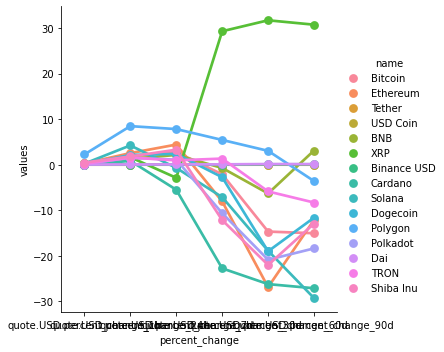

In [96]:
sns.catplot(x='percent_change', y='values', hue='name', data = df6, kind='point')
# the x axis values need to clean up so we can actually see

In [97]:
df6['percent_change']=df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df6

name percent_change    values
0     Bitcoin             1h   0.11700
1     Bitcoin            24h   1.81793
2     Bitcoin             7d   2.78844
3     Bitcoin            30d  -2.11586
4     Bitcoin            60d -14.68914
..        ...            ...       ...
85  Shiba Inu            24h   1.81521
86  Shiba Inu             7d   3.29365
87  Shiba Inu            30d -12.17141
88  Shiba Inu            60d -22.02167
89  Shiba Inu            90d -12.93051

[90 rows x 3 columns]

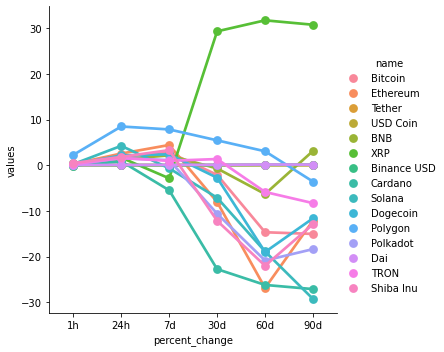

In [98]:
sns.catplot(x='percent_change', y='values', hue='name', data = df6, kind='point')# much easier to see x values

###### XRP did the best over 90 days

In [99]:
df7= df[[ 'name', 'quote.USD.price', 'timestamp' ]]
df7= df7.query("name== 'Bitcoin' ")
df7

name  quote.USD.price                   timestamp
0   Bitcoin      19571.89654  2022-10-17 20:57:02.545781
15  Bitcoin      19574.06318  2022-10-17 20:58:02.873308
30  Bitcoin      19573.81569  2022-10-17 20:59:03.226973
45  Bitcoin      19577.02677  2022-10-17 21:00:05.248926
60  Bitcoin      19578.41103  2022-10-17 21:01:05.513552
75  Bitcoin      19581.87697  2022-10-17 21:02:05.763111

<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

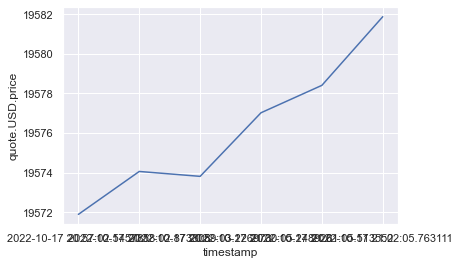

In [100]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data= df7)

##### This shows the fluctuation between each minute it pulled the data from the website but will convert the time so it shows on axis below

In [104]:
df7['timestamp']=pd.to_datetime(df7['timestamp'])
df7

name  quote.USD.price                  timestamp
0   Bitcoin      19571.89654 2022-10-17 20:57:02.545781
15  Bitcoin      19574.06318 2022-10-17 20:58:02.873308
30  Bitcoin      19573.81569 2022-10-17 20:59:03.226973
45  Bitcoin      19577.02677 2022-10-17 21:00:05.248926
60  Bitcoin      19578.41103 2022-10-17 21:01:05.513552
75  Bitcoin      19581.87697 2022-10-17 21:02:05.763111

<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

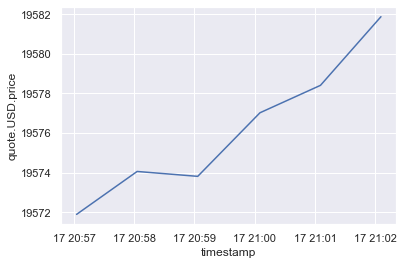

In [105]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data= df7)